In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/classification/main/_static/data/Default.csv')

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [2]:
X = df[['balance', 'income', 'student2']]
y = df.default2

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver='svd')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [5]:
clf.coef_

array([[ 4.81041502e-03,  7.34185754e-06, -5.11940459e-01]])

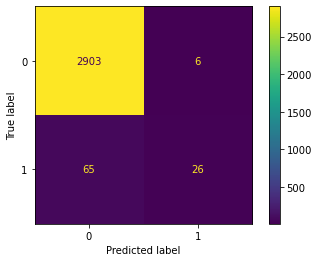

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [7]:
df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_pred})
                    
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,2903,65
Yes,6,26


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      2909
         Yes       0.81      0.29      0.42        91

    accuracy                           0.98      3000
   macro avg       0.90      0.64      0.71      3000
weighted avg       0.97      0.98      0.97      3000



In [9]:
# Obtain probabilities 
y_prob = clf.fit(X_train, y_train).predict_proba(X_test)

In [10]:
# Set threshold 
decision_prob = 0.2

# Build confusion matrix
df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_prob[:,1] > decision_prob})

df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,2818,39
Yes,91,52


In [11]:

print(classification_report(df_['True default status'], df_['Predicted default status'], target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.99      0.97      0.98      2909
         Yes       0.36      0.57      0.44        91

    accuracy                           0.96      3000
   macro avg       0.67      0.77      0.71      3000
weighted avg       0.97      0.96      0.96      3000



In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)

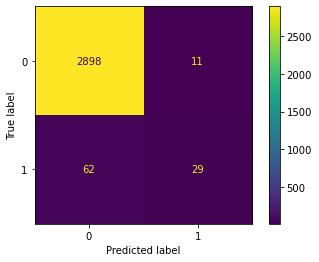

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.979     0.996     0.988      2909
           1      0.725     0.319     0.443        91

    accuracy                          0.976      3000
   macro avg      0.852     0.657     0.715      3000
weighted avg      0.971     0.976     0.971      3000

